In [ ]:
!unzip Loan_predict.zip

Archive:  Loan_predict.zip
  inflating: test_Y3wMUE5_7gLdaTN.csv  
  inflating: train_u6lujuX_CVtuZ9i.csv  


####**Imporing all the dependencies**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

####**Reading the "train.csv" and "test.csv" files**

In [ ]:
df= pd.read_csv("train.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


####**Viewing the statistics and Info of the dataset**

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.duplicated().sum()

0

####**Filling the missing values**

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
def fill_na(df,col):
  if df[col].dtype == 'float64' or df[col].dtype == 'int64':
    df[col] = df[col].fillna(df[col].mean())
  else:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:

fill_na(df,"Gender")
fill_na(df,"Married")
fill_na(df,"Dependents")
fill_na(df,"Self_Employed")
fill_na(df,"LoanAmount")
fill_na(df,"Loan_Amount_Term")
fill_na(df,"Credit_History")

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

####**Countplot**

In [ ]:
def draw_count_plot(df,r,c,arr=[]):
    plt.figure(figsize=(13,25))
    i=1
    for x in arr:
        plt.subplot(r,c,i)
        plt.title(x)
        sns.countplot(df[x])
        i+=1
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

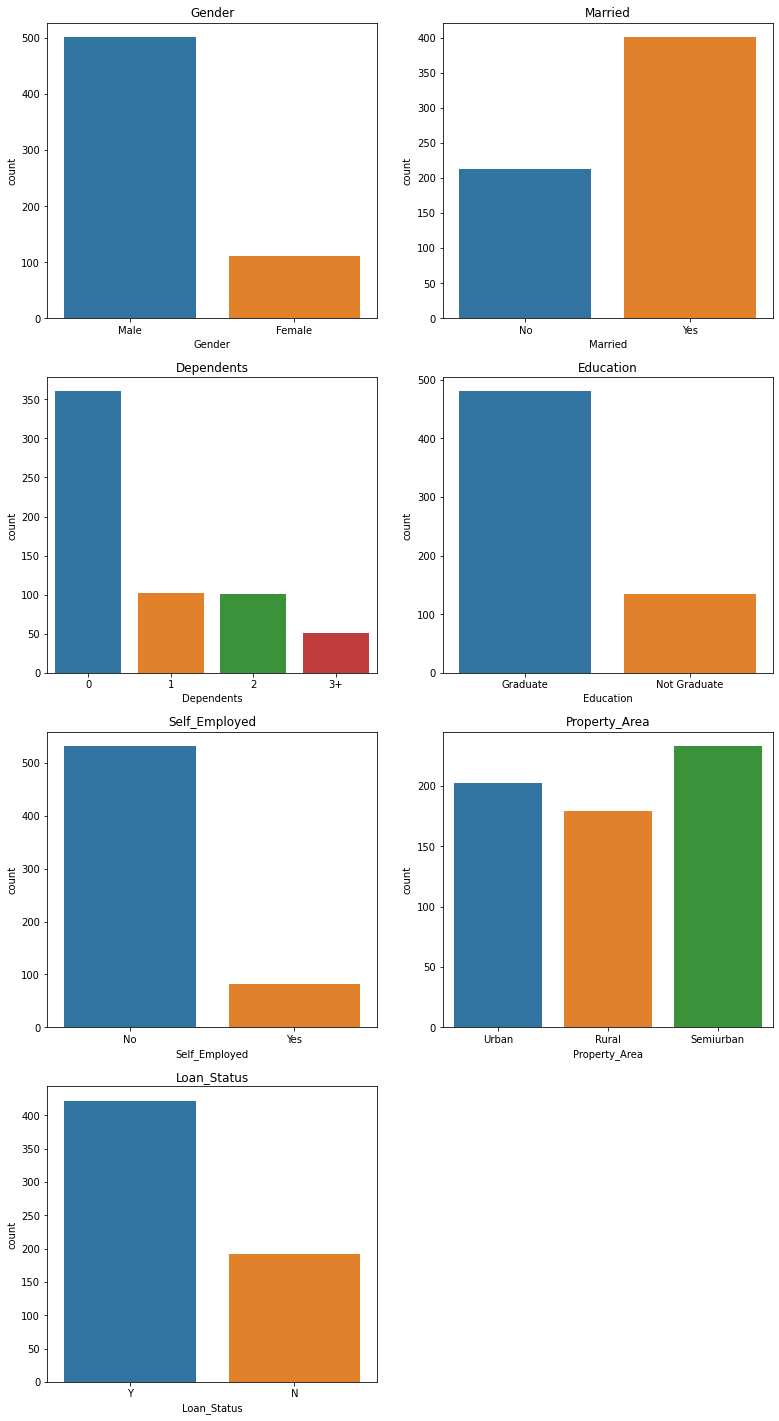

In [ ]:
draw_count_plot(df,4,2,['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'])

####**Distplot**

In [ ]:
def draw_distplot(df,r,c,arr=[]):
    plt.figure(figsize=(13,20))
    i=1
    for x in arr:
        plt.subplot(r,c,i)
        plt.title(x)
        sns.distplot(df[x])
        i+=1
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

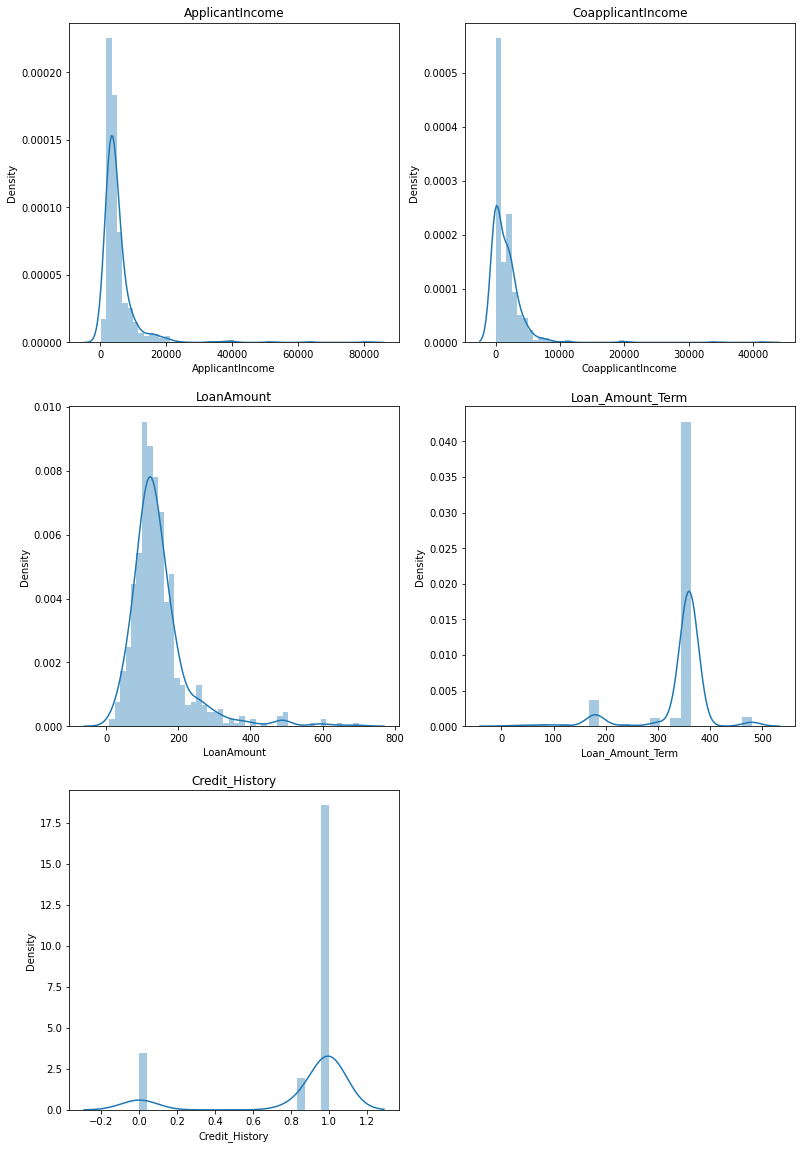

In [ ]:
draw_distplot(df,3,2,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])

####**Histplot**

In [ ]:
def draw_histplot(df,r,c,arr=[]):
    plt.figure(figsize=(15,20))
    i=1
    for x in arr:
        plt.subplot(r,c,i)
        plt.title(x)
        sns.histplot(df[x])
        i+=1
    plt.show()

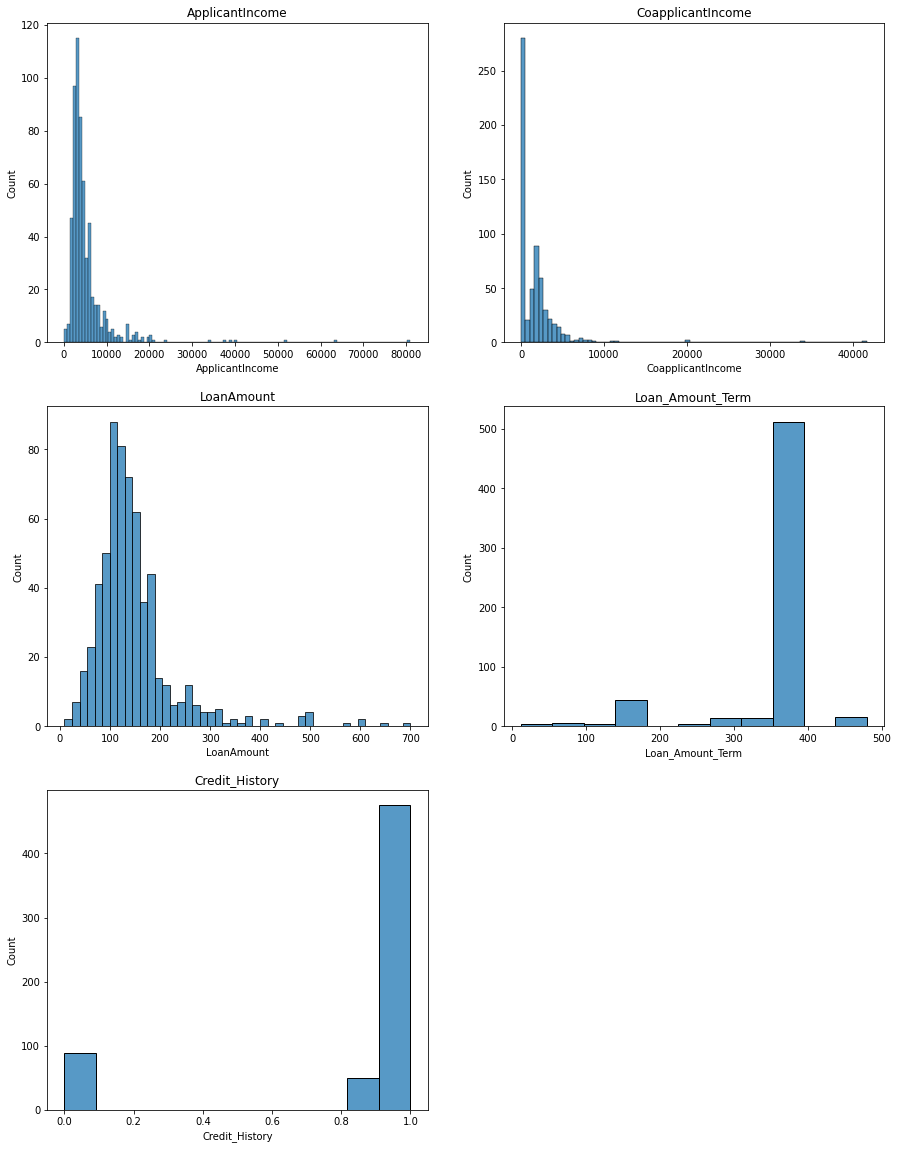

In [ ]:
draw_histplot(df,3,2,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])

####**Feature Creation**

In [ ]:
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [ ]:
df["ApplicantIncome_Log"] = np.log(df["ApplicantIncome"])
df["CoapplicantIncome_Log"] = np.log(df["CoapplicantIncome"])

df["LoanAmount_Log"] = np.log(df["LoanAmount"])
df["Loan_Amount_Term_Log"] = np.log(df["Loan_Amount_Term"])

df["Credit_History_Log"] = np.log(df["Credit_History"])

df.sample(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncome_Log,CoapplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Credit_History_Log
46,LP001138,Male,Yes,1,Graduate,No,5649,0.0,44.0,360.0,1.0,Urban,Y,5649.0,8.639234,-inf,3.784190,5.886104,0.0
601,LP002950,Male,Yes,0,Not Graduate,No,2894,2792.0,155.0,360.0,1.0,Rural,Y,5686.0,7.970395,7.934513,5.043425,5.886104,0.0
277,LP001904,Male,Yes,0,Graduate,No,3103,1300.0,80.0,360.0,1.0,Urban,Y,4403.0,8.040125,7.170120,4.382027,5.886104,0.0
433,LP002387,Male,Yes,0,Graduate,No,2425,2340.0,143.0,360.0,1.0,Semiurban,Y,4765.0,7.793587,7.757906,4.962845,5.886104,0.0
208,LP001699,Male,No,0,Graduate,No,2479,0.0,59.0,360.0,1.0,Urban,Y,2479.0,7.815611,-inf,4.077537,5.886104,0.0
485,LP002544,Male,Yes,1,Not Graduate,No,1958,2436.0,131.0,360.0,1.0,Rural,Y,4394.0,7.579679,7.798113,4.875197,5.886104,0.0
494,LP002585,Male,Yes,0,Graduate,No,3597,2157.0,119.0,360.0,0.0,Rural,N,5754.0,8.187855,7.676474,4.779123,5.886104,-inf
26,LP001068,Male,Yes,0,Graduate,No,2799,2253.0,122.0,360.0,1.0,Semiurban,Y,5052.0,7.937017,7.720018,4.804021,5.886104,0.0
520,LP002689,Male,Yes,2,Not Graduate,No,2192,1742.0,45.0,360.0,1.0,Semiurban,Y,3934.0,7.692570,7.462789,3.806662,5.886104,0.0
527,LP002706,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,Y,6715.0,8.572628,7.265430,5.081404,5.886104,-inf


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

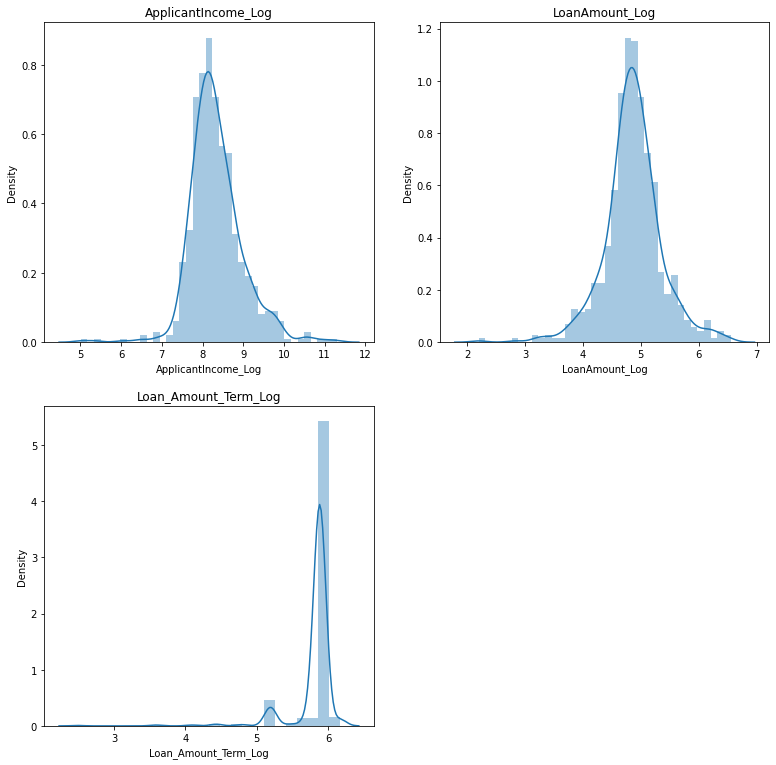

In [ ]:
draw_distplot(df,3,2,['ApplicantIncome_Log','LoanAmount_Log','Loan_Amount_Term_Log'])

####**Heatmap of correlation**

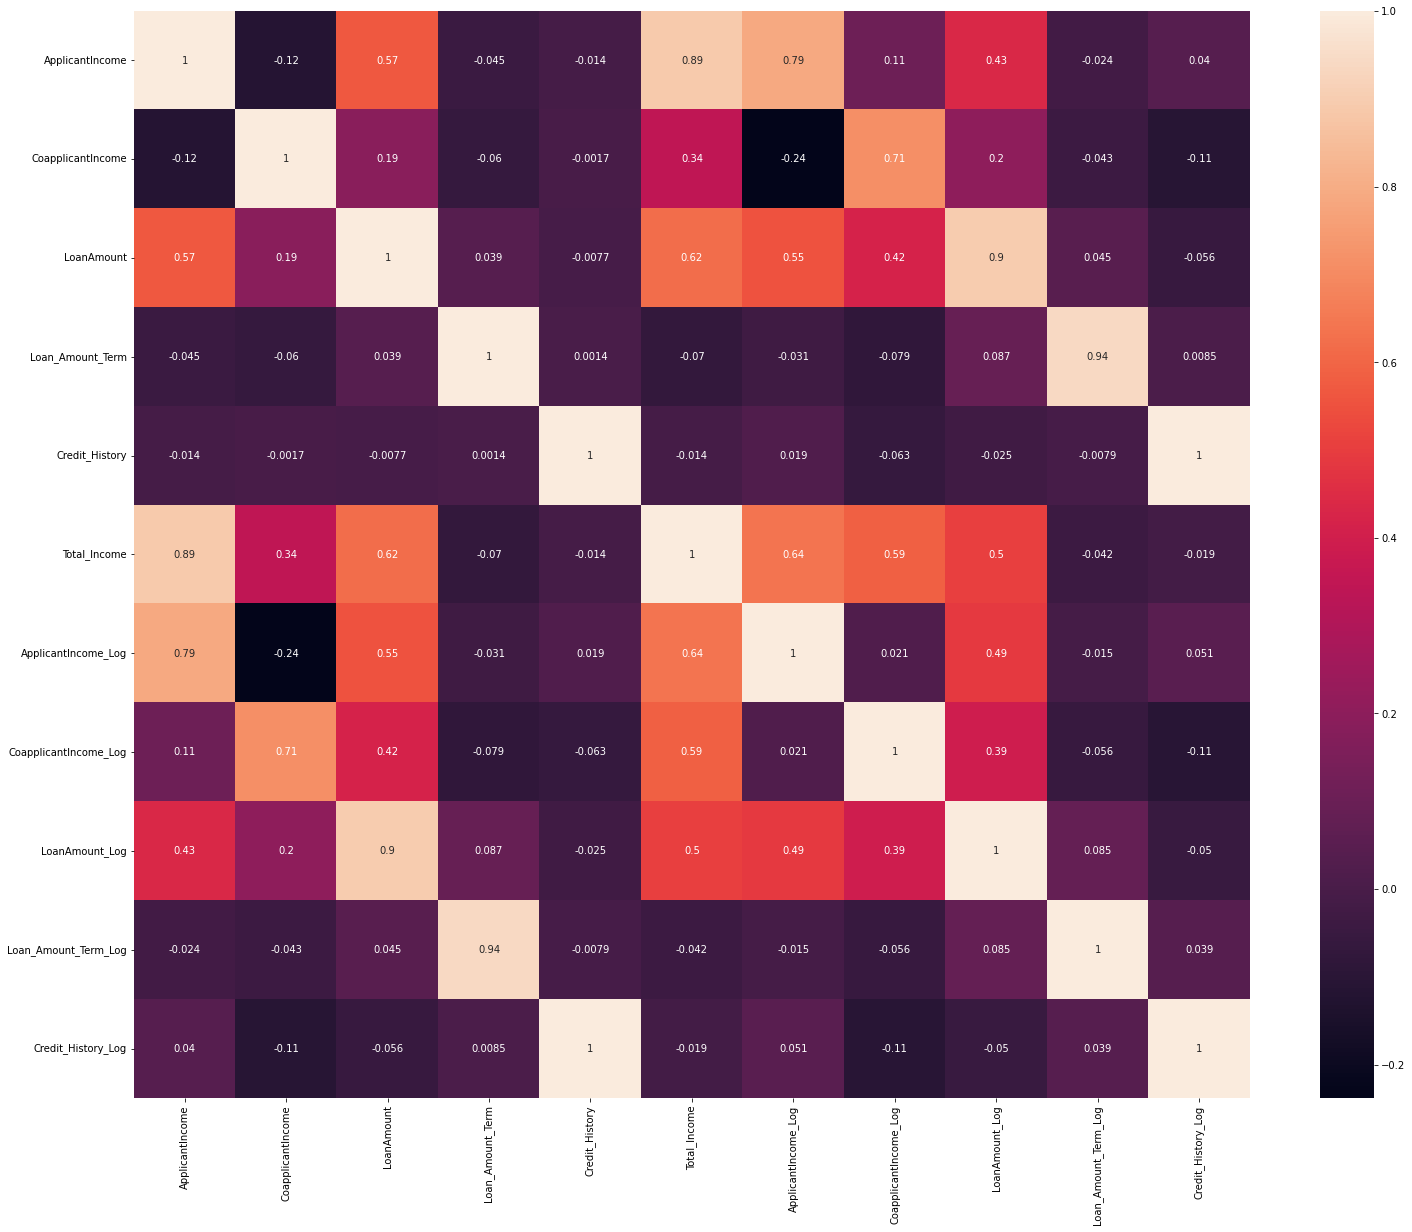

In [ ]:
corr = df.corr()
fig,ax= plt.subplots(figsize=(25,20))
sns.heatmap(corr,annot=True,ax=ax)

####**Dropping the irrelavant columns**

In [ ]:
df.drop(columns=['Loan_ID','ApplicantIncome','CoapplicantIncome_Log','LoanAmount','Loan_Amount_Term','Credit_History_Log'],inplace=True)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log
0,Male,No,0,Graduate,No,0.0,1.0,Urban,Y,5849.0,8.674026,4.986426,5.886104
1,Male,Yes,1,Graduate,No,1508.0,1.0,Rural,N,6091.0,8.430109,4.852030,5.886104
2,Male,Yes,0,Graduate,Yes,0.0,1.0,Urban,Y,3000.0,8.006368,4.189655,5.886104
3,Male,Yes,0,Not Graduate,No,2358.0,1.0,Urban,Y,4941.0,7.856707,4.787492,5.886104
4,Male,No,0,Graduate,No,0.0,1.0,Urban,Y,6000.0,8.699515,4.948760,5.886104


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


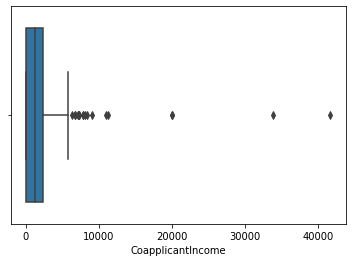

In [ ]:
sns.boxplot(df["CoapplicantIncome"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    object 
 1   Married               614 non-null    object 
 2   Dependents            614 non-null    object 
 3   Education             614 non-null    object 
 4   Self_Employed         614 non-null    object 
 5   CoapplicantIncome     614 non-null    float64
 6   Credit_History        614 non-null    float64
 7   Property_Area         614 non-null    object 
 8   Loan_Status           614 non-null    object 
 9   Total_Income          614 non-null    float64
 10  ApplicantIncome_Log   614 non-null    float64
 11  LoanAmount_Log        614 non-null    float64
 12  Loan_Amount_Term_Log  614 non-null    float64
dtypes: float64(6), object(7)
memory usage: 62.5+ KB


In [ ]:
new_df = df.copy()
f = new_df.copy()

In [ ]:
def subbox(r,c,arr=[]):
    i=1
    plt.figure(figsize=(17,25))
    for x in arr:
        plt.subplot(r,c,i)
        sns.boxplot(df[x])
        i+=1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

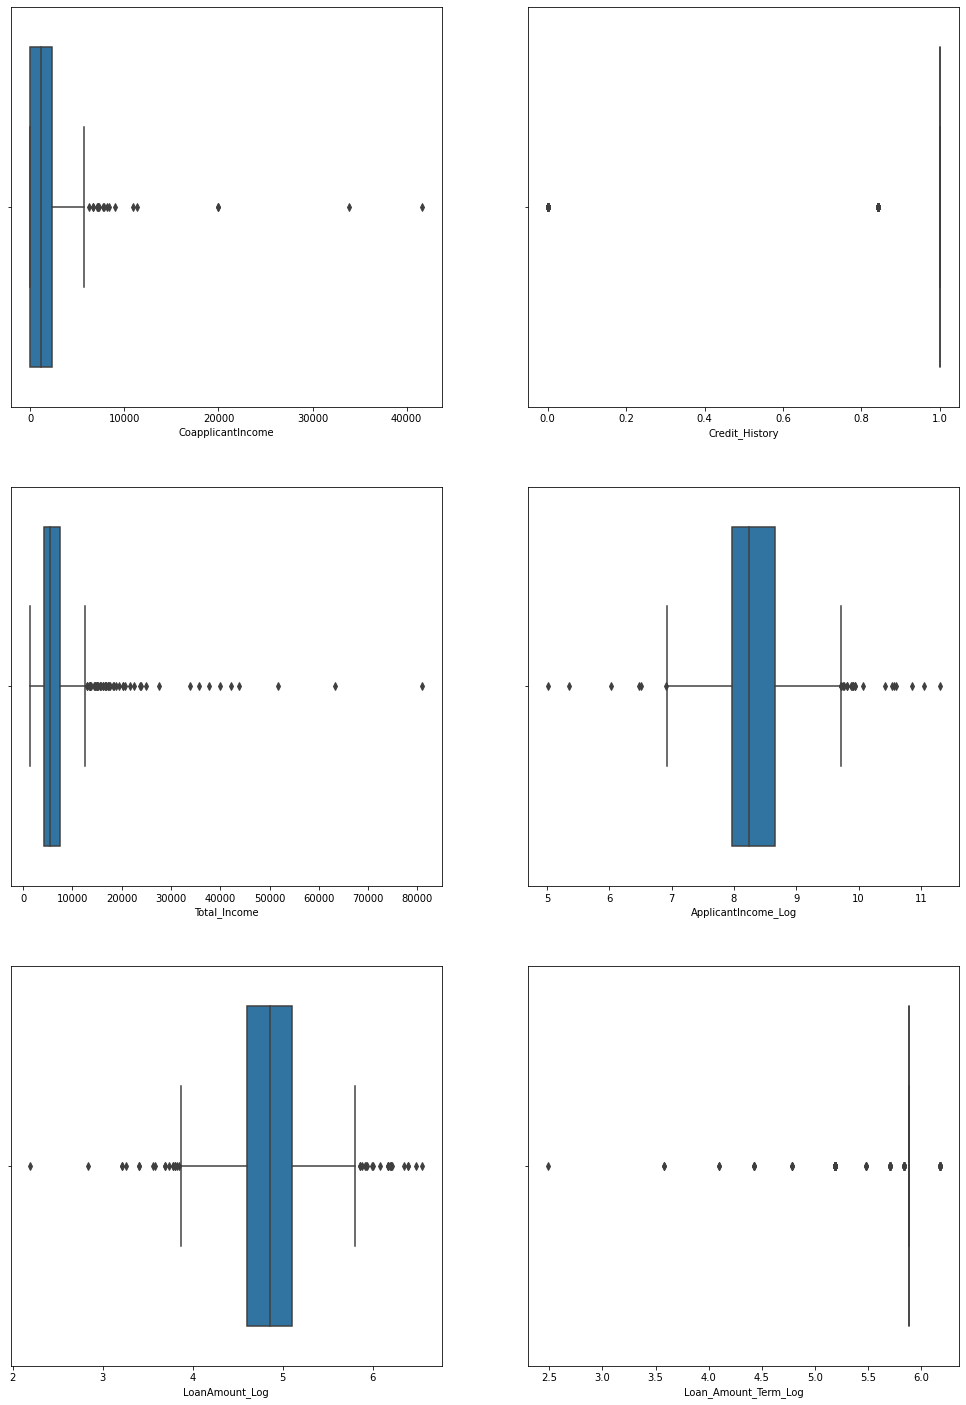

In [ ]:
subbox(3,2,["CoapplicantIncome","Credit_History","Total_Income","ApplicantIncome_Log","LoanAmount_Log","Loan_Amount_Term_Log"])

In [ ]:
def rmoutliers(df,arr=[]):
    for x in arr:
        q1 = df[x].quantile(0.25)
        q3 = df[x].quantile(0.75)
        iqr= q3 -q1

      
        upperlimit = q3 + (1.5 * iqr)
        lowerlimit = q1 - (1.5 * iqr)
        
        df= df[(df[x] >=lowerlimit) & (df[x] <= upperlimit)]
        df.loc[(df[x] >upperlimit),x] = upperlimit
        df.loc[(df[x] <lowerlimit),x] = lowerlimit
    return df

In [ ]:
df= rmoutliers(df,["CoapplicantIncome","Credit_History","Total_Income","ApplicantIncome_Log","LoanAmount_Log","Loan_Amount_Term_Log"])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

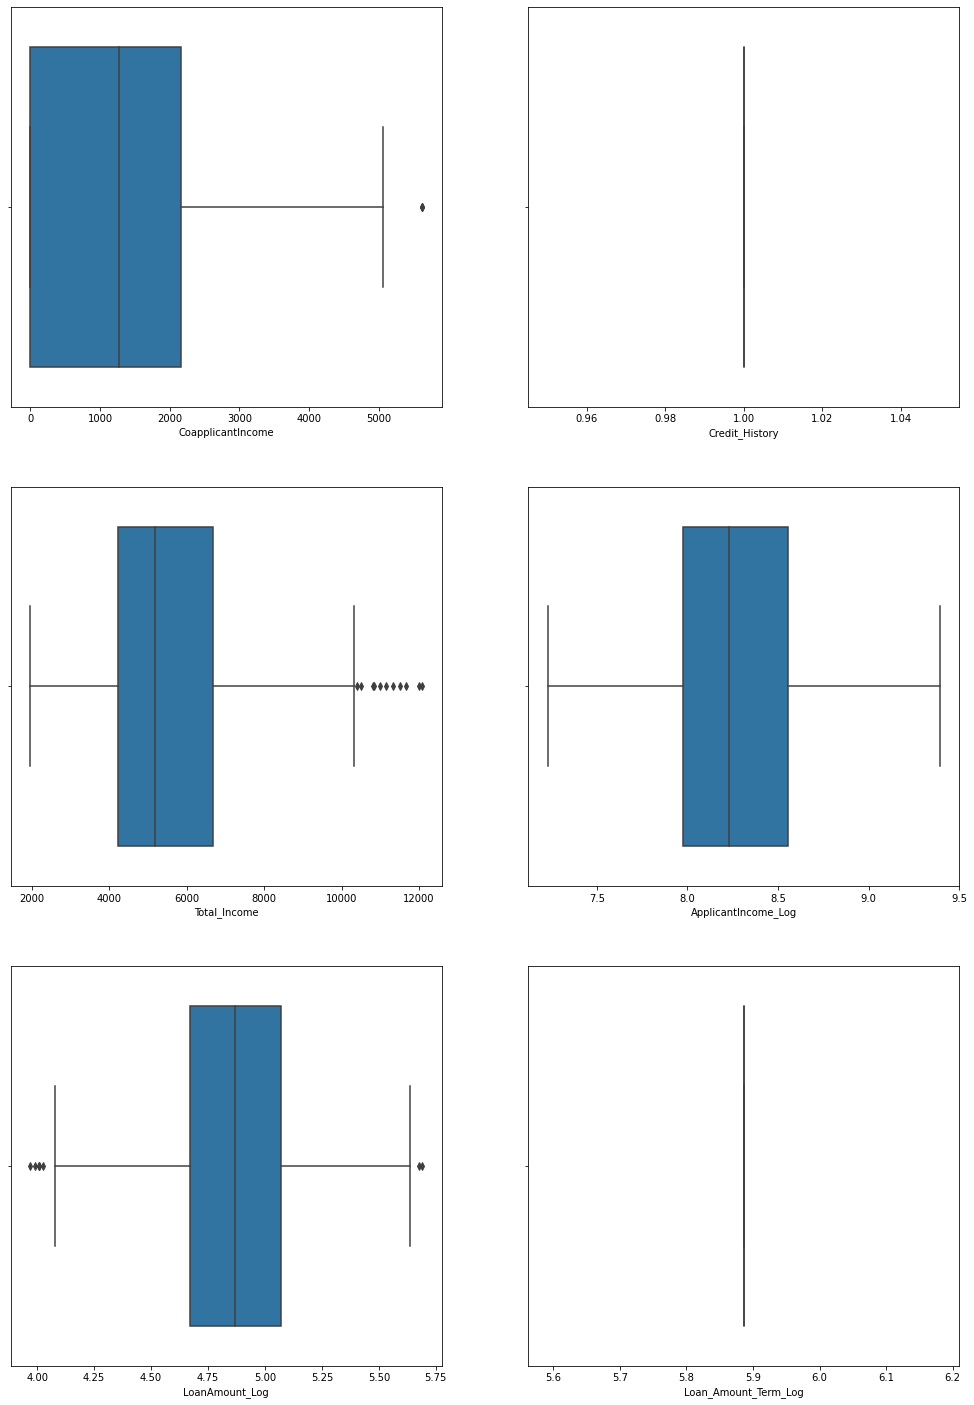

In [ ]:
subbox(3,2,["CoapplicantIncome","Credit_History","Total_Income","ApplicantIncome_Log","LoanAmount_Log","Loan_Amount_Term_Log"])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log
0,Male,No,0,Graduate,No,0.0,1.0,Urban,Y,5849.0,8.674026,4.986426,5.886104
1,Male,Yes,1,Graduate,No,1508.0,1.0,Rural,N,6091.0,8.430109,4.852030,5.886104
2,Male,Yes,0,Graduate,Yes,0.0,1.0,Urban,Y,3000.0,8.006368,4.189655,5.886104
3,Male,Yes,0,Not Graduate,No,2358.0,1.0,Urban,Y,4941.0,7.856707,4.787492,5.886104
4,Male,No,0,Graduate,No,0.0,1.0,Urban,Y,6000.0,8.699515,4.948760,5.886104


####**Encoding the Categorical data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

cols= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

for col in cols:
    df[col]= encode.fit_transform(df[col])

In [ ]:
df.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log
371,1,1,2,0,0,0.0,1.0,1,1,5185.0,8.553525,5.043425,5.886104
169,1,1,2,0,0,0.0,1.0,1,1,8000.0,8.987197,5.298317,5.886104
415,0,0,0,0,0,0.0,1.0,2,1,2995.0,8.004700,4.094345,5.886104
496,1,1,0,1,0,1700.0,1.0,0,1,4300.0,7.863267,4.672829,5.886104
612,1,1,2,0,0,0.0,1.0,2,1,7583.0,8.933664,5.231109,5.886104
547,1,0,0,0,0,1783.0,1.0,0,1,4309.0,7.834392,4.976734,5.886104
35,1,1,0,0,0,2067.0,1.0,2,1,4342.0,7.729735,4.986426,5.886104
357,1,1,1,0,0,0.0,1.0,2,0,3875.0,8.262301,4.204693,5.886104
287,1,1,0,0,0,2000.0,1.0,0,1,5704.0,8.217169,4.787492,5.886104
588,1,0,0,0,0,0.0,1.0,1,1,4750.0,8.465900,4.543295,5.886104


####**Feature Selection - [RFE]**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

selector= RFE(estimator= LogisticRegression() , n_features_to_select=4)

X= df.drop("Loan_Status",axis=1)
Y= df["Loan_Status"]

selector.fit(X,Y)

selector.support_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([ True, False, False,  True, False, False, False, False, False,
        True,  True, False])

In [ ]:
X.columns

for i in range(12):
    if selector.support_[i]:
        print(X.columns[i],selector.ranking_[i])

Gender 1
Education 1
ApplicantIncome_Log 1
LoanAmount_Log 1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 612
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                340 non-null    int64  
 1   Married               340 non-null    int64  
 2   Dependents            340 non-null    int64  
 3   Education             340 non-null    int64  
 4   Self_Employed         340 non-null    int64  
 5   CoapplicantIncome     340 non-null    float64
 6   Credit_History        340 non-null    float64
 7   Property_Area         340 non-null    int64  
 8   Loan_Status           340 non-null    int64  
 9   Total_Income          340 non-null    float64
 10  ApplicantIncome_Log   340 non-null    float64
 11  LoanAmount_Log        340 non-null    float64
 12  Loan_Amount_Term_Log  340 non-null    float64
dtypes: float64(6), int64(7)
memory usage: 37.2 KB


####**Building model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x= df.drop(["Loan_Status","Married","Dependents","Self_Employed","CoapplicantIncome","Property_Area","Total_Income","Loan_Amount_Term_Log","Credit_History"],axis=1)
y= df["Loan_Status"]

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.1)

In [ ]:
x.columns

Index(['Gender', 'Education', 'ApplicantIncome_Log', 'LoanAmount_Log'], dtype='object')

####**Logistic Regression**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(xtrain,ytrain)

log_pred= log_model.predict(xtest)
accuracy_score(ytest,log_pred)

0.9117647058823529

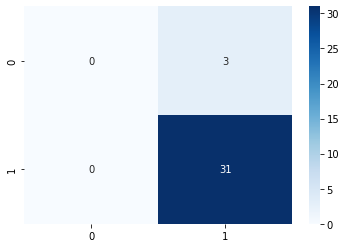

In [ ]:
sns.heatmap(confusion_matrix(ytest,log_pred),annot= True,cmap= "Blues")

####**K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Knn_model = KNeighborsClassifier()

Knn_model.fit(xtrain,ytrain)

Knn_pred= Knn_model.predict(xtest)
accuracy_score(ytest,Knn_pred)

0.8235294117647058

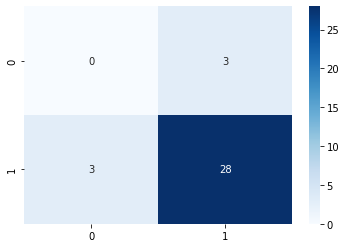

In [ ]:
sns.heatmap(confusion_matrix(ytest,Knn_pred),annot= True,cmap= "Blues")

####**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier()

Tree.fit(xtrain,ytrain)

tree_pred= Tree.predict(xtest)
accuracy_score(ytest,tree_pred)

0.7941176470588235

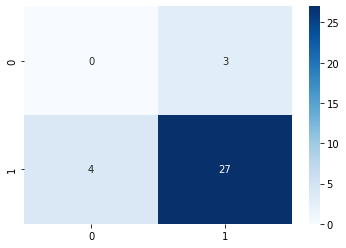

In [ ]:
sns.heatmap(confusion_matrix(ytest,tree_pred),annot= True,cmap= "Blues")

####**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=120 , min_samples_split= 15, max_depth=22 ,max_features=1)

forest.fit(xtrain,ytrain)

for_pred= forest.predict(xtest)
accuracy_score(ytest,for_pred)

0.9117647058823529

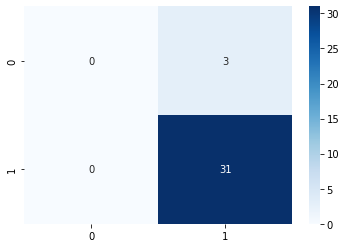

In [ ]:
sns.heatmap(confusion_matrix(ytest,for_pred),annot= True,cmap= "Blues")

####**Extra Tree**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ex_forest = ExtraTreesClassifier(n_estimators=120 , min_samples_split= 15, max_depth=22 ,max_features=1)

ex_forest.fit(xtrain,ytrain)

ex_pred= ex_forest.predict(xtest)
accuracy_score(ytest,ex_pred)

0.9117647058823529

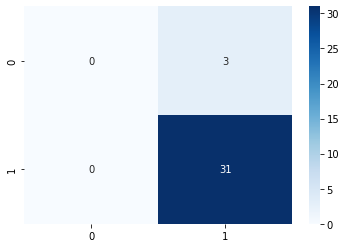

In [ ]:
sns.heatmap(confusion_matrix(ytest,ex_pred),annot= True,cmap= "Blues")

####**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gdboost_model = GradientBoostingClassifier()

gdboost_model.fit(xtrain,ytrain)

gb_pred= gdboost_model.predict(xtest)
accuracy_score(ytest,gb_pred)

0.8823529411764706

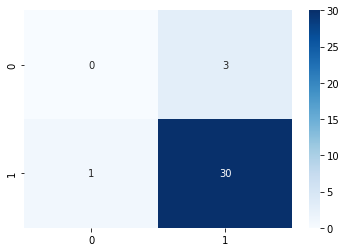

In [ ]:
sns.heatmap(confusion_matrix(ytest,gb_pred),annot= True,cmap= "Blues")

####**Cross Validation Score For All The Models**

In [ ]:
from sklearn.model_selection import cross_val_score

def accuracy(model,x,y):
    score= cross_val_score(model,x,y,cv=5)
    print(model,':',np.mean(score)*100)

In [ ]:
accuracy(log_model,x,y)
accuracy(Knn_model,x,y)
accuracy(Tree,x,y)
accuracy(forest,x,y)
accuracy(ex_forest,x,y)
accuracy(gdboost_model,x,y)

LogisticRegression() : 81.76470588235294
KNeighborsClassifier() : 77.35294117647058
DecisionTreeClassifier() : 73.82352941176471
RandomForestClassifier(max_depth=22, max_features=1, min_samples_split=15,
                       n_estimators=120) : 80.88235294117648
ExtraTreesClassifier(max_depth=22, max_features=1, min_samples_split=15,
                     n_estimators=120) : 81.17647058823529
GradientBoostingClassifier() : 78.52941176470588
